## 全连接神经网络

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

### Boston

In [2]:
from sklearn import datasets

boston = datasets.load_boston()

X = boston.data
y = boston.target

### 将 type 转为 float32

In [3]:
X = X.astype(np.float32)
y = y.astype(np.float32)

### split training set and testing set

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

### 标准化

In [5]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(X_train)
X_train_standard = standard.transform(X_train)
X_test_standard = standard.transform(X_test)

### 将 array 转为 tensor

In [6]:
X_tensor_train = torch.from_numpy(X_train_standard)
X_tensor_test = torch.from_numpy(X_test_standard)
y_tensor_train = torch.from_numpy(y_train)
y_tensor_test = torch.from_numpy(y_test)

In [7]:
print('the type of X is: ', type(X_tensor_train), 'the dtype is:', X_tensor_train.dtype)
print('the type of y is: ', type(X_tensor_test), 'the dtype is:', X_tensor_test.dtype)
print('the type of X is: ', type(y_tensor_train), 'the dtype is:', y_tensor_train.dtype)
print('the type of y is: ', type(y_tensor_test), 'the dtype is:', y_tensor_test.dtype)

the type of X is:  <class 'torch.Tensor'> the dtype is: torch.float32
the type of y is:  <class 'torch.Tensor'> the dtype is: torch.float32
the type of X is:  <class 'torch.Tensor'> the dtype is: torch.float32
the type of y is:  <class 'torch.Tensor'> the dtype is: torch.float32


In [8]:
print('the shape of X_train: ', X_tensor_train.shape)
print('the shape of X_test: ', X_tensor_test.shape)
print('the shape of y_train: ', y_tensor_train.shape)
print('the shape of y_test: ', y_tensor_test.shape)

the shape of X_train:  torch.Size([404, 13])
the shape of X_test:  torch.Size([102, 13])
the shape of y_train:  torch.Size([404])
the shape of y_test:  torch.Size([102])


In [9]:
X_train_variable = Variable(X_tensor_train)
X_test_variable = Variable(X_tensor_test)
y_train_variable = Variable(y_tensor_train)
y_test_variable = Variable(y_tensor_test)

### 搭建 全连接神经网络

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(13, 64),
            nn.ReLU(inplace=True),
            nn.Linear(64, 32),
            nn.ReLU(inplace=True),
            nn.Linear(32, 1),
#            nn.ReLU(inplace=True),
        )
        
    def forward(self, x):
        # 真正搭网络的地方, x 输入信息
        x = self.model(x)
        return x

In [11]:
net = Net()
net

Net(
  (model): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [12]:
# 查看模型参数
net.parameters

<bound method Module.parameters of Net(
  (model): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)>

In [13]:
# 优化器 和 损失函数
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss_func = nn.MSELoss()

In [14]:
# 开始训练
EPOCH = 80000

train_losses = [] # 查看训练集的损失函数变化
test_losses = [] # 查看测试集的损失函数变化
for epoch in range(EPOCH):
    
    train_prediction = net(X_train_variable)
    train_loss = loss_func(y_train_variable.view(-1, 1), train_prediction)
    train_losses.append(train_loss)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print('Training...Epoch: ', (epoch+1), 'train loss: ', train_loss.data.numpy())
    if (epoch + 1) % 500 == 0:
        test_prediction = net(X_test_variable)
        test_loss = loss_func(y_test_variable.view(-1, 1), test_prediction)
        test_losses.append(test_loss)

        optimizer.zero_grad()
        test_loss.backward()
        optimizer.step()
        print('Test...Epoch: ', (epoch+1), 'test loss: ', test_loss.data.numpy())

Training...Epoch:  100 train loss:  75.72067
Training...Epoch:  200 train loss:  19.437244
Training...Epoch:  300 train loss:  13.875433
Training...Epoch:  400 train loss:  11.382866
Training...Epoch:  500 train loss:  10.0129795
Test...Epoch:  500 test loss:  21.790512
Training...Epoch:  600 train loss:  9.083582
Training...Epoch:  700 train loss:  8.338634
Training...Epoch:  800 train loss:  7.646943
Training...Epoch:  900 train loss:  7.007945
Training...Epoch:  1000 train loss:  6.4086375
Test...Epoch:  1000 test loss:  17.695995
Training...Epoch:  1100 train loss:  5.847684
Training...Epoch:  1200 train loss:  5.3593183
Training...Epoch:  1300 train loss:  4.924471
Training...Epoch:  1400 train loss:  4.535159
Training...Epoch:  1500 train loss:  4.2056193
Test...Epoch:  1500 test loss:  15.736033
Training...Epoch:  1600 train loss:  3.8303056
Training...Epoch:  1700 train loss:  3.5519183
Training...Epoch:  1800 train loss:  3.3114905
Training...Epoch:  1900 train loss:  3.097793

Training...Epoch:  14800 train loss:  0.09226549
Training...Epoch:  14900 train loss:  0.090064056
Training...Epoch:  15000 train loss:  0.08777944
Test...Epoch:  15000 test loss:  9.536051
Training...Epoch:  15100 train loss:  0.08766184
Training...Epoch:  15200 train loss:  0.085284226
Training...Epoch:  15300 train loss:  0.083393455
Training...Epoch:  15400 train loss:  0.08154045
Training...Epoch:  15500 train loss:  0.079765365
Test...Epoch:  15500 test loss:  9.391382
Training...Epoch:  15600 train loss:  0.079728484
Training...Epoch:  15700 train loss:  0.0779075
Training...Epoch:  15800 train loss:  0.07630043
Training...Epoch:  15900 train loss:  0.074726604
Training...Epoch:  16000 train loss:  0.07310314
Test...Epoch:  16000 test loss:  9.205906
Training...Epoch:  16100 train loss:  0.073154055
Training...Epoch:  16200 train loss:  0.07143903
Training...Epoch:  16300 train loss:  0.07003553
Training...Epoch:  16400 train loss:  0.068700194
Training...Epoch:  16500 train los

Training...Epoch:  29000 train loss:  0.017418593
Test...Epoch:  29000 test loss:  5.91917
Training...Epoch:  29100 train loss:  0.018064626
Training...Epoch:  29200 train loss:  0.017534077
Training...Epoch:  29300 train loss:  0.017265186
Training...Epoch:  29400 train loss:  0.017042434
Training...Epoch:  29500 train loss:  0.016839828
Test...Epoch:  29500 test loss:  5.8556733
Training...Epoch:  29600 train loss:  0.017453222
Training...Epoch:  29700 train loss:  0.01693055
Training...Epoch:  29800 train loss:  0.016673675
Training...Epoch:  29900 train loss:  0.016467482
Training...Epoch:  30000 train loss:  0.016271109
Test...Epoch:  30000 test loss:  5.808544
Training...Epoch:  30100 train loss:  0.017004846
Training...Epoch:  30200 train loss:  0.0164363
Training...Epoch:  30300 train loss:  0.01619394
Training...Epoch:  30400 train loss:  0.015993442
Training...Epoch:  30500 train loss:  0.015808113
Test...Epoch:  30500 test loss:  5.7430296
Training...Epoch:  30600 train loss

Training...Epoch:  43100 train loss:  0.008358276
Training...Epoch:  43200 train loss:  0.0080512455
Training...Epoch:  43300 train loss:  0.007917403
Training...Epoch:  43400 train loss:  0.007814659
Training...Epoch:  43500 train loss:  0.0077222986
Test...Epoch:  43500 test loss:  4.391587
Training...Epoch:  43600 train loss:  0.008124414
Training...Epoch:  43700 train loss:  0.007841932
Training...Epoch:  43800 train loss:  0.0077054924
Training...Epoch:  43900 train loss:  0.00760588
Training...Epoch:  44000 train loss:  0.007542988
Test...Epoch:  44000 test loss:  4.358034
Training...Epoch:  44100 train loss:  0.0079160435
Training...Epoch:  44200 train loss:  0.00764787
Training...Epoch:  44300 train loss:  0.007517976
Training...Epoch:  44400 train loss:  0.0074206106
Training...Epoch:  44500 train loss:  0.00742642
Test...Epoch:  44500 test loss:  4.3145423
Training...Epoch:  44600 train loss:  0.0077197
Training...Epoch:  44700 train loss:  0.007451749
Training...Epoch:  4480

Training...Epoch:  57100 train loss:  0.004400063
Training...Epoch:  57200 train loss:  0.004209945
Training...Epoch:  57300 train loss:  0.0041629495
Training...Epoch:  57400 train loss:  0.0043948106
Training...Epoch:  57500 train loss:  0.004153904
Test...Epoch:  57500 test loss:  3.5662162
Training...Epoch:  57600 train loss:  0.0043003066
Training...Epoch:  57700 train loss:  0.004122116
Training...Epoch:  57800 train loss:  0.0055452124
Training...Epoch:  57900 train loss:  0.0039899643
Training...Epoch:  58000 train loss:  0.0040382543
Test...Epoch:  58000 test loss:  3.544631
Training...Epoch:  58100 train loss:  0.004234539
Training...Epoch:  58200 train loss:  0.004040531
Training...Epoch:  58300 train loss:  0.0039714305
Training...Epoch:  58400 train loss:  0.0039439593
Training...Epoch:  58500 train loss:  0.004797617
Test...Epoch:  58500 test loss:  3.5191061
Training...Epoch:  58600 train loss:  0.0041268175
Training...Epoch:  58700 train loss:  0.0039449516
Training...E

Training...Epoch:  71100 train loss:  0.0024617303
Training...Epoch:  71200 train loss:  0.002293675
Training...Epoch:  71300 train loss:  0.0022933937
Training...Epoch:  71400 train loss:  0.002605993
Training...Epoch:  71500 train loss:  0.0023787047
Test...Epoch:  71500 test loss:  3.0422025
Training...Epoch:  71600 train loss:  0.0024099916
Training...Epoch:  71700 train loss:  0.0022501769
Training...Epoch:  71800 train loss:  0.006252931
Training...Epoch:  71900 train loss:  0.00296879
Training...Epoch:  72000 train loss:  0.0036618076
Test...Epoch:  72000 test loss:  3.0277934
Training...Epoch:  72100 train loss:  0.0023457035
Training...Epoch:  72200 train loss:  0.0021877033
Training...Epoch:  72300 train loss:  0.0032422633
Training...Epoch:  72400 train loss:  0.003041337
Training...Epoch:  72500 train loss:  0.002401182
Test...Epoch:  72500 test loss:  3.0115557
Training...Epoch:  72600 train loss:  0.002318924
Training...Epoch:  72700 train loss:  0.002156049
Training...Ep

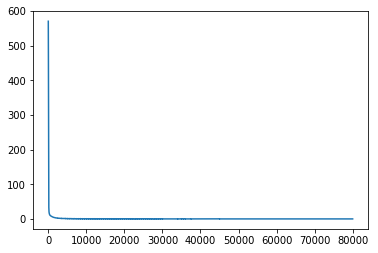

In [15]:
plt.plot(range(len(train_losses)), train_losses)

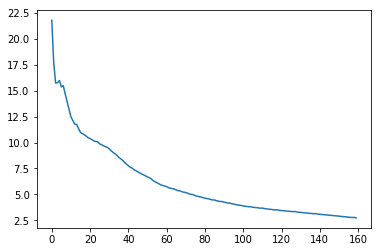

In [16]:
plt.plot(range(len(test_losses)), test_losses)

In [17]:
y_train_predict = train_prediction.data.numpy()
y_test_predict = test_prediction.data.numpy()

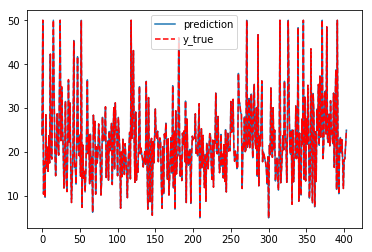

In [18]:
plt.plot(range(len(y_train_predict)), y_train_predict, label='prediction')
plt.plot(range(len(y_train)), y_train, 'r--', label='y_true')
plt.legend()
plt.show()

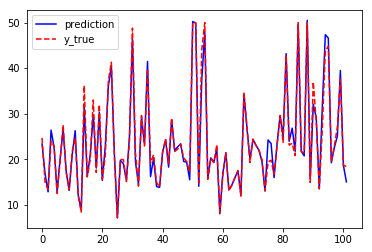

In [19]:
plt.plot(range(len(y_test_predict)), y_test_predict, 'b', label='prediction')
plt.plot(range(len(y_test)),  y_test, 'r--', label='y_true')
plt.legend()
plt.show()

In [20]:
# 使用 sklearn 封装好的评估指标
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse_2 = mean_squared_error(y_test, y_test_predict)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_test_predict))
mae_2 = mean_absolute_error(y_test, y_test_predict)
r2_2 = r2_score(y_test, y_test_predict)

In [21]:
print('MSE: ', mse_2)
print('RMSE: ', rmse_2)
print('MAE: ', mae_2)
print('R2: ', r2_2)

MSE:  2.732639
RMSE:  1.6530696
MAE:  1.0256397
R2:  0.9738834904480943
